## Density Models Assignment

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [2]:
X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.6,
                random_state=0) # rules!

* plot data points

X[whichrow?,whichcolumn?] or X[:everyrow,0firstcolumn]

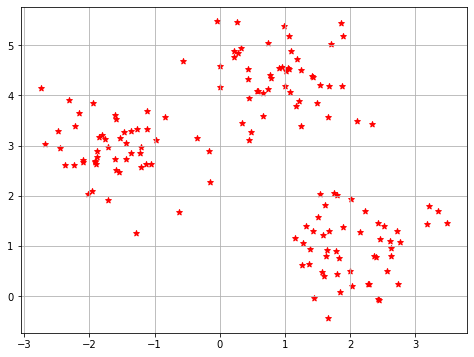

In [28]:
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(X[:,0],X[:,1],c="red",marker="*")
plt.grid()
plt.show()

* define function plot_clusters

In [30]:
def plot_clusters(X,y_res,plt_cluster_centers=False):
    X_centers = []
    Y_centers = []
    
    for i in set(y_res):
        x = X[y_res == i,0]
        y = X[y_res == i,1]
        X_centers.append(np.mean(x))
        Y_centers.append(np.mean(y))
        
        plt.scatter(x,y,marker="*",c="red",label="cluster {}".format(i))
        
    if plt_cluster_centers:
        plt.scatter(X_centers,
                    Y_centers,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space

In [104]:
def plot_clusters_dbscan(X,y_res, ax=None, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    if ax is None:
        fig, ax = plt.subplots()

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        ax.scatter(x,
                    y,
                    s=5,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        ax.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=25,
                    label='centroids')
    ax.grid()

In [100]:
db = DBSCAN(eps=0.7, # 6,7 works well
            min_samples=10,
            metric='euclidean')

* combinations (hint: use 'product' function from 'itertools')

In [101]:
y_db = db.fit_predict(X)

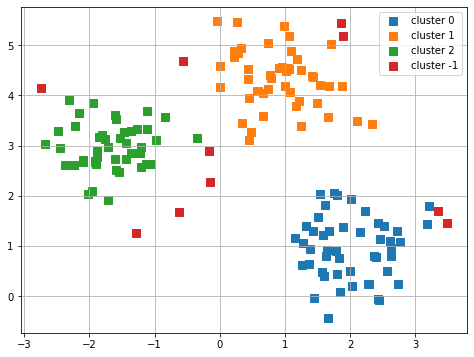

In [102]:
plot_clusters_dbscan(X,y_db) # without itertools... manually found best result I think...

In [90]:
from itertools import product

In [73]:
# epslist = [0.2,0.3,0.4,0.5,0.6,0.7,0.8] needed?
# min_samples = [4,6,8,10,12]
# y_db2 = DBScan(eps=) this won't work...
# 

In [97]:
a = [0.3,0.5,0.7]
b = [8,10,12]
list(product(a,b))

[(0.3, 8),
 (0.3, 10),
 (0.3, 12),
 (0.5, 8),
 (0.5, 10),
 (0.5, 12),
 (0.7, 8),
 (0.7, 10),
 (0.7, 12)]

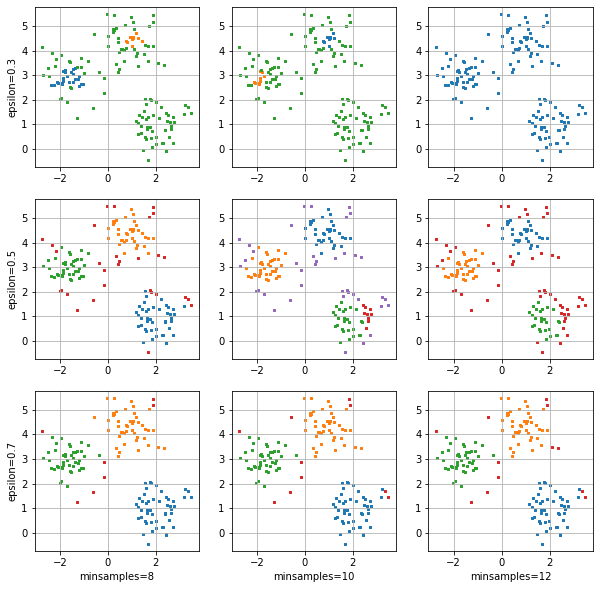

In [112]:
fig, axs = plt.subplots(3,3, figsize=(10,10))

for row, eps in enumerate(a):
    for col, minsamples in enumerate(b):
        db = DBSCAN(eps=eps, 
            min_samples=minsamples,
            metric='euclidean')
        y_db = db.fit_predict(X)
        plot_clusters_dbscan(X,y_db,ax=axs[row,col])

for col, minsamples in enumerate(b):
    axs[2,col].set_xlabel("minsamples=" + str(minsamples))
    
for row, eps in enumerate(a):
    axs[row,0].set_ylabel("epsilon=" + str(eps))